# Generate all appropriate files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = pd.read_csv(r"C:\Users\corma\Documents\ML4QS\PythonCode\chapter5_result.csv")
data['Unnamed: 0']  = pd.to_datetime(data['Unnamed: 0'])

C:\Users\corma\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
data = data.rename(columns = {'Unnamed: 0': 'time'})

In [3]:
data.set_index('time', inplace=True)

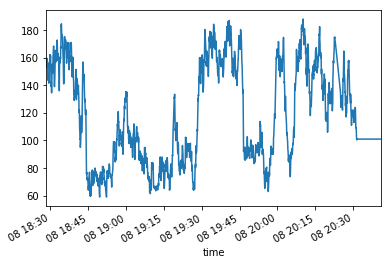

In [4]:
plot = data['hr_watch_rate'].plot()

In [7]:
dataset

array([159.5    , 154.33333, 156.     , ..., 101.     , 101.     ,
       101.     ], dtype=float32)

# Recurrent Neural network

In [9]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv(r"C:\Users\corma\Documents\ML4QS\PythonCode\chapter5_result.csv")
dataset = dataframe['hr_watch_rate']

def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

dataset = timeseries_to_supervised(dataset, lag=1)

dataset = dataset.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
 - 9s - loss: 0.0323
Epoch 2/100
 - 5s - loss: 8.4999e-04
Epoch 3/100
 - 5s - loss: 5.7506e-04
Epoch 4/100
 - 6s - loss: 5.9432e-04
Epoch 5/100
 - 5s - loss: 5.8746e-04
Epoch 6/100
 - 6s - loss: 5.8866e-04
Epoch 7/100
 - 5s - loss: 5.9500e-04
Epoch 8/100
 - 5s - loss: 5.8594e-04
Epoch 9/100
 - 6s - loss: 5.9094e-04
Epoch 10/100
 - 5s - loss: 5.9153e-04
Epoch 11/100
 - 5s - loss: 5.8913e-04
Epoch 12/100
 - 5s - loss: 5.8893e-04
Epoch 13/100
 - 5s - loss: 5.8892e-04
Epoch 14/100
 - 5s - loss: 5.8102e-04
Epoch 15/100
 - 5s - loss: 5.8892e-04
Epoch 16/100
 - 5s - loss: 5.8594e-04
Epoch 17/100
 - 5s - loss: 5.9423e-04
Epoch 18/100
 - 6s - loss: 5.8300e-04
Epoch 19/100
 - 6s - loss: 5.8464e-04
Epoch 20/100
 - 5s - loss: 5.8720e-04
Epoch 21/100
 - 5s - loss: 5.8524e-04
Epoch 22/100
 - 6s - loss: 5.7675e-04
Epoch 23/100
 - 5s - loss: 5.8400e-04
Epoch 24/100
 - 6s - loss: 5.7903e-04
Epoch 25/100
 - 5s - loss: 5.8484e-04
Epoch 26/100
 - 5s - loss: 5.7799e-04
Epoch 27/100
 - 5s - loss

ValueError: non-broadcastable output operand with shape (1937,1) doesn't match the broadcast shape (1937,2)